In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('Hotels_data_best_discount.csv')

In [4]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Snapshot ID,Snapshot Date,Checkin Date,Days,Original Price,Discount Price,Discount Code,Available Rooms,Hotel Name,Hotel Stars,DayDiff,WeekDay,DiscountDiff,DiscountPerc
0,349,349,1,2015-07-17,2015-07-18,5,1395,1245,2,-1,Home2 Suites by Hilton NY Long Island City Man...,3,1,Saturday,150,10.752688
1,365,365,1,2015-07-17,2015-07-18,5,548,515,2,-1,Howard Johnson Inn Queens,2,1,Saturday,33,6.021898
2,329,329,1,2015-07-17,2015-07-18,5,1365,1185,2,-1,Newark Liberty International Airport Marriott,4,1,Saturday,180,13.186813
3,262,262,1,2015-07-17,2015-07-18,5,3700,3600,2,6,Park Hyatt New York,5,1,Saturday,100,2.702703
4,94,94,1,2015-07-17,2015-07-18,5,780,630,1,2,Ramada Staten Island,3,1,Saturday,150,19.230769


In [5]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
df["Snapshot Date"] = lb_make.fit_transform(df["Snapshot Date"])
df["Checkin Date"] = lb_make.fit_transform(df["Checkin Date"])
df["Hotel Name"] = lb_make.fit_transform(df["Hotel Name"])
df["WeekDay"] = lb_make.fit_transform(df["WeekDay"])
df=df[['Snapshot Date','Checkin Date','DayDiff','Hotel Name','WeekDay','Discount Code']].dropna(axis=0, how='any')

In [6]:
df.head()

,Snapshot Date,Checkin Date,DayDiff,Hotel Name,WeekDay,Discount Code
0,0,0,1,223,2,2
1,0,0,1,264,2,2
2,0,0,1,327,2,2
3,0,0,1,341,2,2
4,0,0,1,361,2,1


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
# Split dataset in training and test datasets
used_features =['Snapshot Date','Checkin Date','DayDiff','Hotel Name','WeekDay']
features = df[used_features]
classes = df['Discount Code']
X_train, X_test, Y_train, Y_test = train_test_split(features,classes, test_size=0.4)

In [9]:
from sklearn.naive_bayes import GaussianNB

In [10]:
# Instantiate the classifier
gnb = GaussianNB()
# Train classifier
gnb.fit(
    X_train,
    Y_train
)

GaussianNB(priors=None)

In [11]:
expected = Y_test
predicted = gnb.predict(X_test)

In [12]:
from sklearn import metrics
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

             precision    recall  f1-score   support

          1       0.30      0.11      0.16     11212
          2       0.32      0.72      0.44     13703
          3       0.33      0.23      0.27     11527
          4       0.00      0.00      0.00      6478

avg / total       0.27      0.32      0.25     42920

[[1181 8434 1597    0]
 [1287 9895 2521    0]
 [ 811 8099 2617    0]
 [ 623 4697 1158    0]]


C:\Users\yahalom\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [13]:
gnb.predict([[0,0,1,223,2]])[0]

1

# PCA

In [14]:
from sklearn import preprocessing

In [15]:
# center and scale the data
# after centering the avarage value for each will be 0 and the standard daviation 1
# we pass transpose of the features
scaled_data = preprocessing.scale(features.T)

In [16]:
from sklearn.decomposition import PCA

In [17]:
pca = PCA()

In [18]:
# fitting (claculate loading scores and the variation each principal component accounts for)
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [19]:
# generate coordinates for the graph based on the calculated scores and variations
pca_data = pca.transform(scaled_data)

In [20]:
import numpy as np
import matplotlib.pyplot as plt

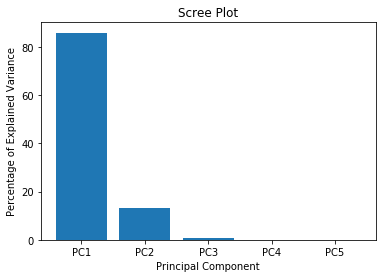

In [21]:
#The following code constructs the Scree plot
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
 
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

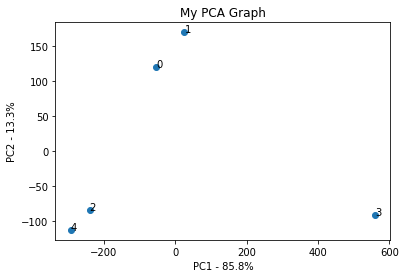

In [22]:
# almost all variation is at PC1 so 2D graph should explain well the data
#the following code makes a fancy looking plot using PC1 and PC2
pca_df = pd.DataFrame(pca_data, columns=labels)
 
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
 
for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
 
plt.show()

In [23]:
# we can see that features 2 and 4 are close and also closer to 0 and 1 than 3 which is not correlated to those
# now Determine which had the biggest influence on PC1

## get the name of the top 10 measurements that contribute
## most to pc1.
## first, get the loading scores
loading_scores = pd.Series(pca.components_[0])
## now sort the loading scores based on their magnitude
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
 
# get the names of the top 10
top_10 = sorted_loading_scores[0:10].index.values
 
## print the top rows and their scores (and +/- sign)
print(loading_scores[top_10])

44451     0.003295
105257    0.003295
60503     0.003295
93072     0.003295
106293    0.003295
81536     0.003295
85824     0.003295
68604     0.003295
106292    0.003295
81535     0.003295
dtype: float64


In [54]:
from sklearn.metrics import accuracy_score

In [61]:
# train and test the classifier with printing results
def testClassifierPerformance(df,used_features,classes,classifier):
    print(used_features)
    features_df = df[used_features]
    classes_df = df[classes] 
    X_train, X_test, Y_train, Y_test = train_test_split(features_df,classes_df, test_size=0.4,stratify=classes_df)
    classifier.fit(X_train,Y_train)
    print(metrics.classification_report(expected, predicted))
    print(metrics.confusion_matrix(expected, predicted))
    print(accuracy_score(expected,predicted))

# PCA - Accuracy improvement trial (remove features 0 and 2)

In [56]:
# Without 'Snapshot Date' and 'DayDiff'
used_features =['Checkin Date','Hotel Name','WeekDay']
features = df[used_features]
classes = df['Discount Code']
X_train, X_test, Y_train, Y_test = train_test_split(features,classes, test_size=0.4,stratify=classes)

In [57]:
# Instantiate the classifier
gnb = GaussianNB()
# Train classifier
gnb.fit(
    X_train,
    Y_train
)

GaussianNB(priors=None)

In [58]:
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

             precision    recall  f1-score   support

          1       0.73      0.77      0.75     11183
          2       0.74      0.76      0.75     13556
          3       0.76      0.73      0.74     11585
          4       0.73      0.68      0.70      6596

avg / total       0.74      0.74      0.74     42920

[[ 8663  1295   757   468]
 [ 1609 10258  1174   515]
 [  918  1603  8400   664]
 [  660   689   791  4456]]


In [62]:
testClassifierPerformance(df,used_features,'Discount Code',gnb)

['Snapshot Date', 'Checkin Date', 'Hotel Name', 'WeekDay', 'DayDiff']
             precision    recall  f1-score   support

          1       0.73      0.77      0.75     11183
          2       0.74      0.76      0.75     13556
          3       0.76      0.73      0.74     11585
          4       0.73      0.68      0.70      6596

avg / total       0.74      0.74      0.74     42920

[[ 8663  1295   757   468]
 [ 1609 10258  1174   515]
 [  918  1603  8400   664]
 [  660   689   791  4456]]
0.7403774464119292


In [63]:
# Without 'Snapshot Date' and 'DayDiff'
used_features =['Snapshot Date','Checkin Date','Hotel Name','WeekDay','DayDiff']
testClassifierPerformance(df,used_features,'Discount Code',GaussianNB())

['Snapshot Date', 'Checkin Date', 'Hotel Name', 'WeekDay', 'DayDiff']
             precision    recall  f1-score   support

          1       0.73      0.77      0.75     11183
          2       0.74      0.76      0.75     13556
          3       0.76      0.73      0.74     11585
          4       0.73      0.68      0.70      6596

avg / total       0.74      0.74      0.74     42920

[[ 8663  1295   757   468]
 [ 1609 10258  1174   515]
 [  918  1603  8400   664]
 [  660   689   791  4456]]
0.7403774464119292


In [32]:
import seaborn as sns

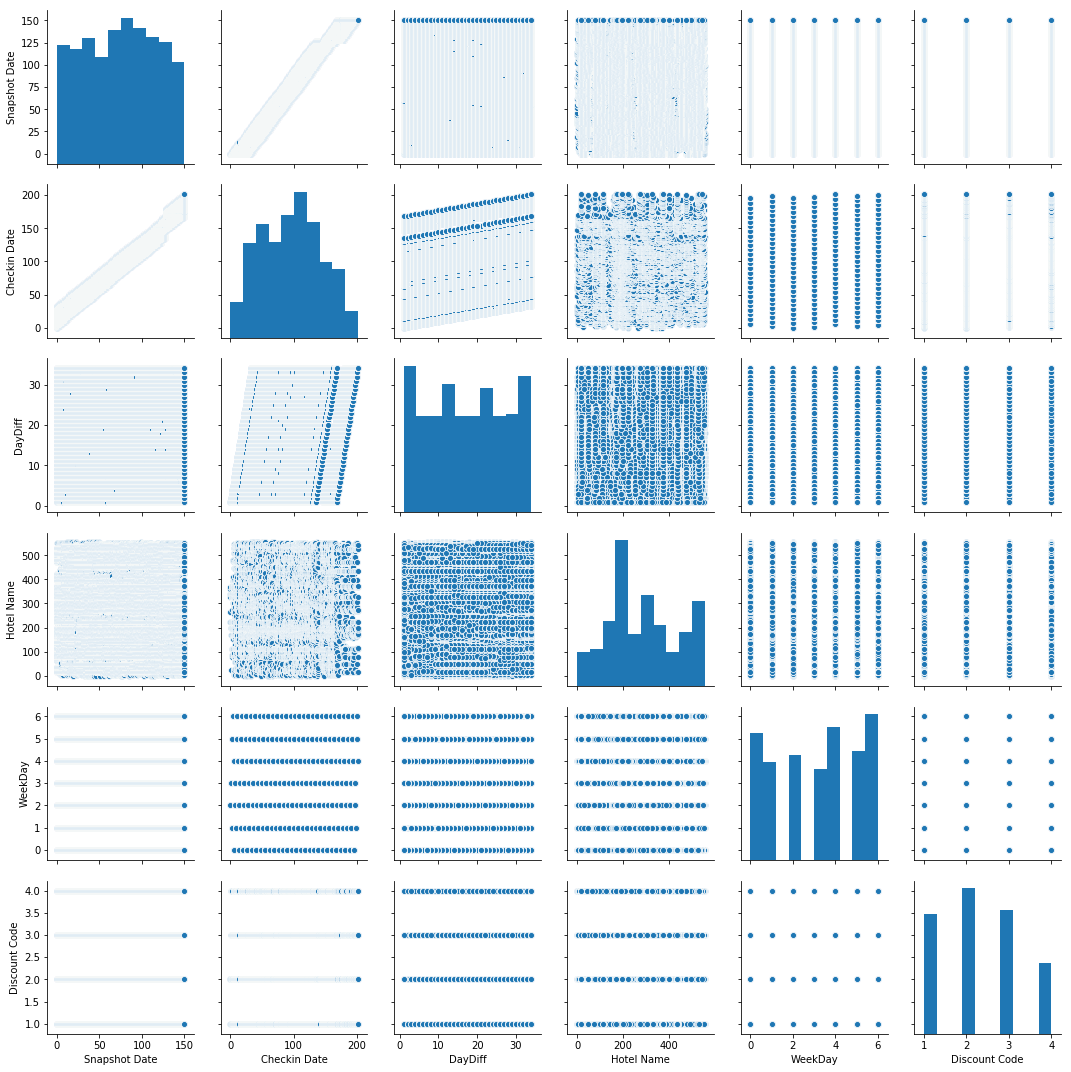

In [33]:
sns.pairplot(df.dropna())

In [34]:
from sklearn import tree
dt_classifier = tree.DecisionTreeClassifier()
dt_classifier = dt_classifier.fit(X_train, Y_train)

In [35]:
expected = Y_test
predicted = dt_classifier.predict(X_test)

In [36]:
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

             precision    recall  f1-score   support

          1       0.73      0.77      0.75     11183
          2       0.74      0.76      0.75     13556
          3       0.76      0.73      0.74     11585
          4       0.73      0.68      0.70      6596

avg / total       0.74      0.74      0.74     42920

[[ 8663  1295   757   468]
 [ 1609 10258  1174   515]
 [  918  1603  8400   664]
 [  660   689   791  4456]]
